In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

### Create a function that plots the distribution  of the digits of a given array and the one according to Benford's law

In [3]:
def benford(n):
    b= np.array([0,30.1, 17.6,12.5,9.7,7.9,6.7,5.8,5.1,4.6])
    return b*n/100

In [4]:
def Benf(w):
    # extract the first digit
    for j in range(len(w)):
        w[j]=int(str(w[j])[0])
    
    # count the frequency of each digit
    count = pd.Series(w).value_counts().sort_index()
    
    # it might be that a digit is missing. put zero instead.
    c = pd.DataFrame(count)
    c.index= [int(x) for x in c.index]
    z = pd.DataFrame({'a': np.zeros(10)},np.arange(0,10))
    join_df = c.join(z,how='outer').fillna(0)
    c = list(join_df[0]+join_df['a'])
    
    # plot this distribution and the one according to Benford's law
    fig = plt.figure()
    ax = fig.gca()
    ax.set_xticks(np.arange(0, 10))
    plt.scatter(np.arange(0,10), c, label = 'Naive')
    plt.scatter(np.arange(0,10), benford(len(w)), color = 'r', label = 'Benford')
    ax.legend(['Array','Benford'])
    plt.grid()
    plt.show()
    
  #  print('Frequency of the given array: \n', count, '\n')
  #  print('Frequency according to Benford distribution: \n', pd.Series(benford(len(w))), '\n')
    print('Mean squared error: \n', mean_squared_error(pd.Series(benford(len(w)))/np.linalg.norm(pd.Series(benford(len(w)))),c/np.linalg.norm(c)))
    return 

### Let's try it on a random array of length 5674

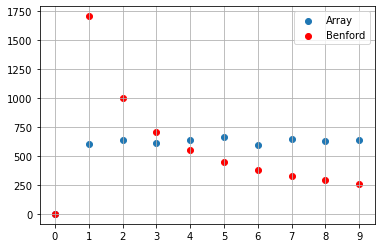

Mean squared error: 
 0.03781216544081484


In [5]:
w = np.random.rand(5674)*1000000
Benf(w)

## Now it's time to take some real dataset and see whether Benford's law holds

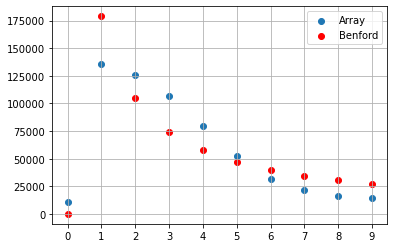

Mean squared error: 
 0.007915887631583922


In [6]:
# we take the Fraud Detection on Bank Payments dataset from 
# https://www.kaggle.com/turkayavci/fraud-detection-on-bank-payments/data

df = pd.read_csv('fraud_detection_bank_dataset.csv')

# and consider the column with the amount of the purchase 
amount = df['amount'].to_numpy()
Benf(amount)

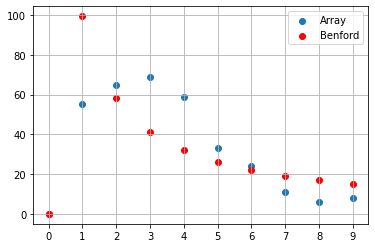

Mean squared error: 
 0.02143477182282583


In [7]:
# Consider the MusicNet dataset, a collection of 330 freely-licensed classical music recordings
# https://www.kaggle.com/imsparsh/musicnet-dataset?select=musicnet_metadata.csv

df_1 = pd.read_csv('musicnet_metadata.csv')

# and consider the column with the duration of the recording, in seconds
sec = df_1['seconds'].to_numpy()
Benf(sec)

# NOPE... it looks more like a gaussian

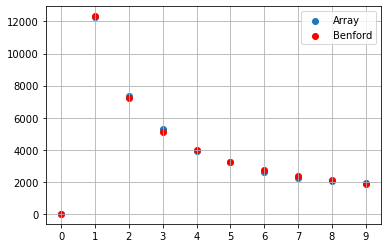

Mean squared error: 
 3.0102467959192566e-05


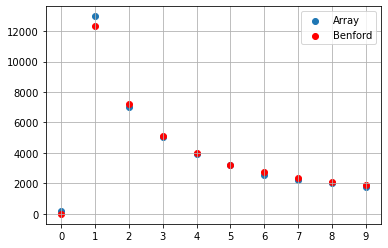

Mean squared error: 
 0.00017602090506565115


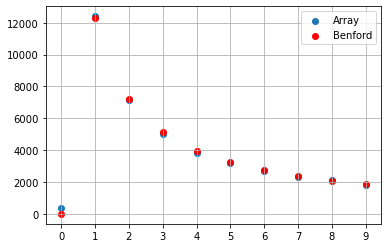

Mean squared error: 
 7.387179698519809e-05


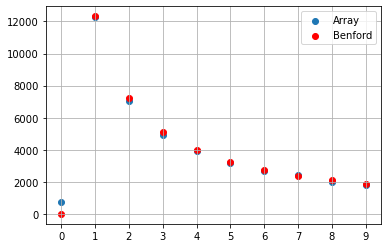

Mean squared error: 
 0.00023453220560126217


In [95]:
# Trending YouTube Video Statistics
# https://www.kaggle.com/datasnaek/youtube-new?select=USvideos.csv

dfYT = pd.read_csv('USvideos.csv')

attr = ['views', 'likes', 'dislikes', 'comment_count']

dfYT_copy= dfYT.copy()
for col in attr:
    Benf(dfYT_copy[col].to_numpy())
    
# WOW!! I don't need to explain the results... it fits perfectly :) 
# we could try to study the outliars and see what they have in common

#### Let's study in more detail the YouTube dataframe

In [130]:
# missing values?

dfYT.isnull().sum() # only a large amount in the 'description' column has NaN values
dfYT.drop(['description'], axis=1, inplace= True)
dfYT.isnull().sum() 

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

In [131]:
# I'm courious about how old are the videos -- I suppose the oldest have more chances to have highest views/likes/etc..

dfYT['publish_time'] = pd.to_datetime(dfYT['publish_time'])
dates = dfYT['publish_time'].copy()
print('Oldest video: ', min(dates))
print('Most recent video: ', max(dates))

Oldest video:  2006-07-23 08:24:11+00:00
Most recent video:  2018-06-14 01:31:53+00:00


In [138]:
# how many days later after the publication a video goes in the trends?

# dfYT['trending_date'] = pd.to_datetime(dfYT['trending_date'])
# it looks the dates have a strange format... convert it to timedate accordingly
dfYT['trending_date'] = pd.to_datetime(dfYT['trending_date'], format = '%y.%d.%m')
# don't consider timezone of the published time, as I don't know the one of the trending date
dfYT['publish_time'] = dfYT['publish_time'].apply(lambda x: x.replace(tzinfo=None))
# calculate the delta
diff = dfYT['trending_date']-dfYT['publish_time']

print ('Minimum time: ', diff.min())
print ('Maximum time: ', diff.max())
print ('Mean time: ', diff.mean())
print ('Median time: ', diff.median())
# mean value and mean are quite different.. the most of the videos are viral in very short time!
dfYT['trending_time'] = diff

Minimum time:  -1 days +10:59:56
Maximum time:  4214 days 15:35:49
Mean time:  16 days 05:21:53.236220
Median time:  4 days 18:59:55


In [136]:
# erase some useless column
droppable = ['video_id', 
             'tags',
             'thumbnail_link']
dfYT.drop(droppable, axis = 1, inplace= True)

In [139]:
dfYT

,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending_time
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,748374,57527,2966,15954,False,False,False,0 days 06:46:59
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,2418783,97185,6146,12703,False,False,False,0 days 16:30:00
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,3191434,146033,5339,8181,False,False,False,1 days 04:54:36
3,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,343168,10172,666,2146,False,False,False,0 days 12:59:56
4,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,2095731,132235,1989,17518,False,False,False,1 days 05:58:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04,1685609,38160,1385,2657,False,False,False,26 days 10:59:56
40945,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18 01:00:06,1064798,60008,382,3936,False,False,False,26 days 22:59:54
40946,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22,1066451,48068,1032,3992,False,False,False,26 days 06:25:38
40947,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17 17:00:04,5660813,192957,2846,13088,False,False,False,27 days 06:59:56
